In this notebook we will use a HuggingFace dataset.  HuggingFace is a platform for data, ML models and demos which has become extremely popular in recent years.


In [1]:
import pandas as pd

In [2]:
# First you must install the "datasets" library, which belongs to HuggingFace
# in case you are working locally with conda, you may need to install it
# another way.

#!pip install datasets


  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/09/7e/fd4d6441a541dba61d0acb3c1fd5df53214c2e9033854e837a99dd9e0793/datasets-2.14.5-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/ea/24/be24e4bfc75e7a8d222bd00801eb9ce86693112ffcc1d89cd3829c3cd837/xxhash-3.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/c6/c9/820b5ab056f4ada76fbe05bd481a948f287957d6cbfd59e2dd2618b408c1/multiprocess-0.70.15-py39-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0.0,>=0.14.0 from https://files.pythonhosted.org/packages/72/21/51cddb8850ed3f4dbc21e57c3dabc49e64d5577857ddda7b2eb0ffc2ec0e/huggingface_hub-0.17.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294

In [3]:
# Let´s take a glimpse at the list of datasets available on huggingface
# just to get an idea
from datasets import list_datasets

all_datasets = list_datasets() # add with_details=True to see more information

print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

/var/folders/0k/2zhx10hd5qz8b06qzfvsxwn80000gn/T/ipykernel_65889/1744179826.py:4: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets() # add with_details=True to see kmore information


There are 62668 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
# Let's download a dataset of tweets, with an "emotion" label attached
# to each tweet.
from datasets import load_dataset, Dataset
emotions = load_dataset("SetFit/emotion")

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [7]:
#inspecting the type
type(emotions)

datasets.dataset_dict.DatasetDict

In [6]:
#printing it
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [9]:
# Train set - note that it is fixed and standard - you do not sample your
# own training set (although you could if you wanted to).  This allows
# reproducibility and comparability - everyone in the research community runs on
# the same training set, and solutions can be both reproduced and compared with
# others.

train = emotions["train"].to_pandas()
val = emotions["validation"].to_pandas()

In [10]:
# How much training data?
len(train)

16000

In [11]:
# How much validation?
len(val)

2000

In [13]:
# printing the first 20 records of train
train.head(20)

text  label label_text
0                             i didnt feel humiliated      0    sadness
1   i can go from feeling so hopeless to so damned...      0    sadness
2    im grabbing a minute to post i feel greedy wrong      3      anger
3   i am ever feeling nostalgic about the fireplac...      2       love
4                                i am feeling grouchy      3      anger
5   ive been feeling a little burdened lately wasn...      0    sadness
6   ive been taking or milligrams or times recomme...      5   surprise
7   i feel as confused about life as a teenager or...      4       fear
8   i have been with petronas for years i feel tha...      1        joy
9                                 i feel romantic too      2       love
10  i feel like i have to make the suffering i m s...      0    sadness
11  i do feel that running is a divine experience ...      1        joy
12  i think it s the easiest time of year to feel ...      3      anger
13                 i feel low energy i m just thirsty      0    sadness
14  i have immense sympathy with the general point...      1        joy
15    i do not feel reassured anxiety is on each side      1        joy
16               i didnt really feel that embarrassed      0    sadness
17            i feel pretty pathetic most of the time      0    sadness
18  i started feeling sentimental about dolls i ha...      0    sadness
19  i now feel compromised and skeptical of the va...      4       fear

<Axes: >

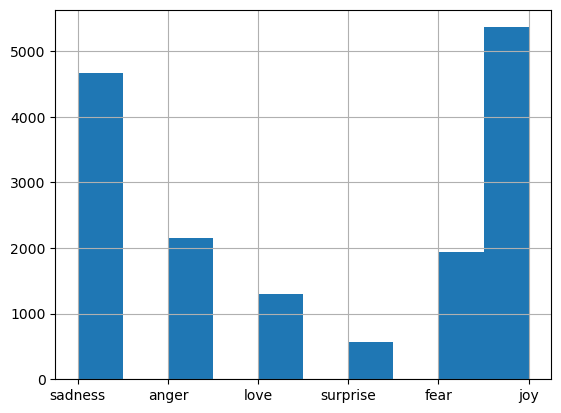

In [14]:
#plotting a histogram to count occurences of each label_text
train["label_text"].hist()

We can see that the most common feeling is a around 30% of the dataset.  This is our benchmark.  Any accuracy lower than 70% is basically not learning anything.

In [15]:
import matplotlib
import pylab as plt
from wordcloud import WordCloud

# A function for drawing a wordcloud from a long piece of text
def draw_my_wordcloud(text):
  cloud=WordCloud(width=800, height=600).generate(text)
  plt.figure(figsize=(16,10))
  plt.imshow(cloud)
  plt.axis('off')


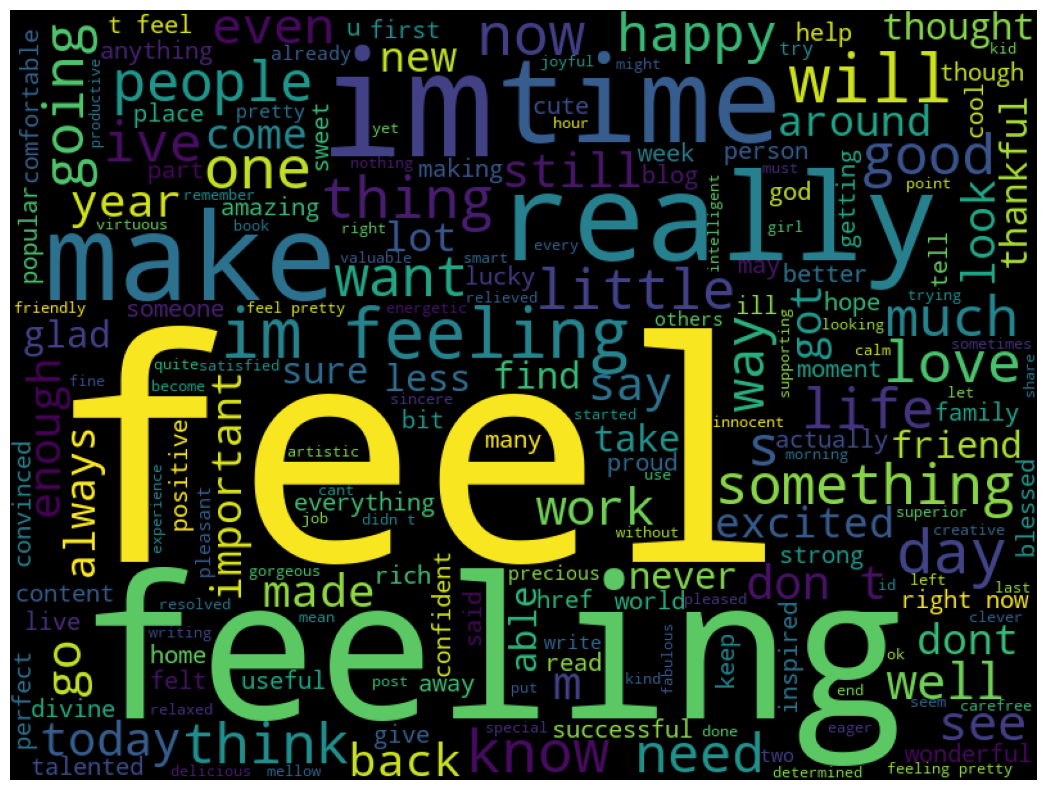

In [16]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='joy']))

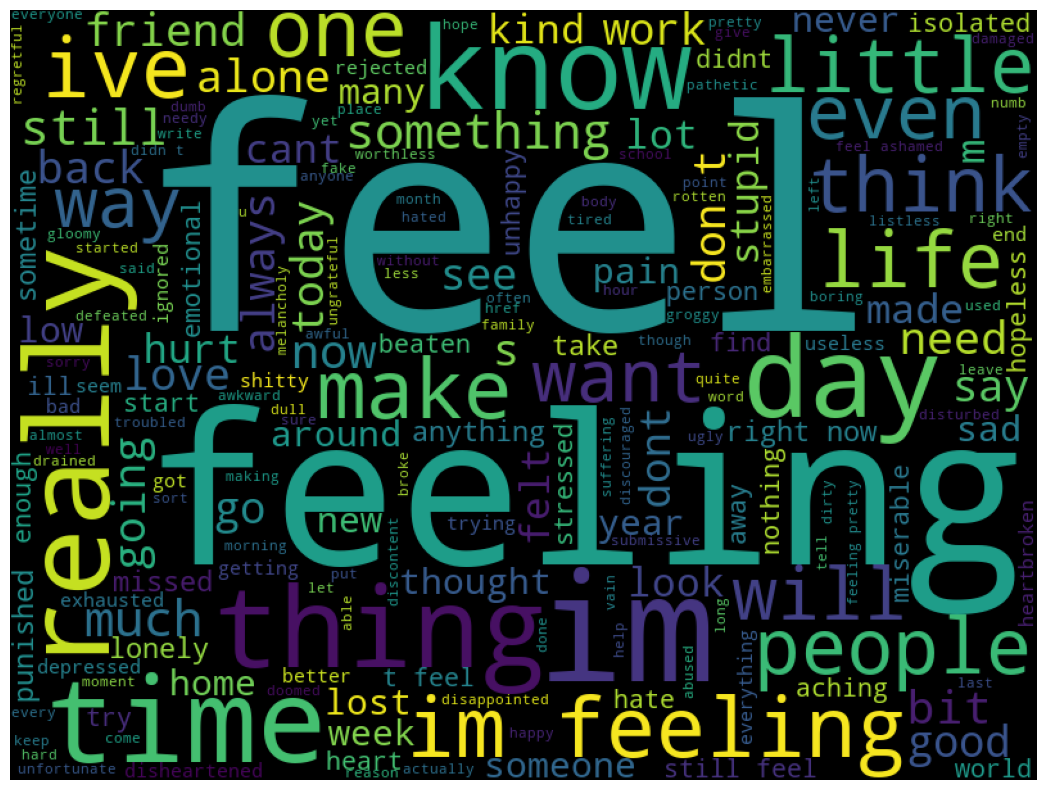

In [17]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='sadness']))

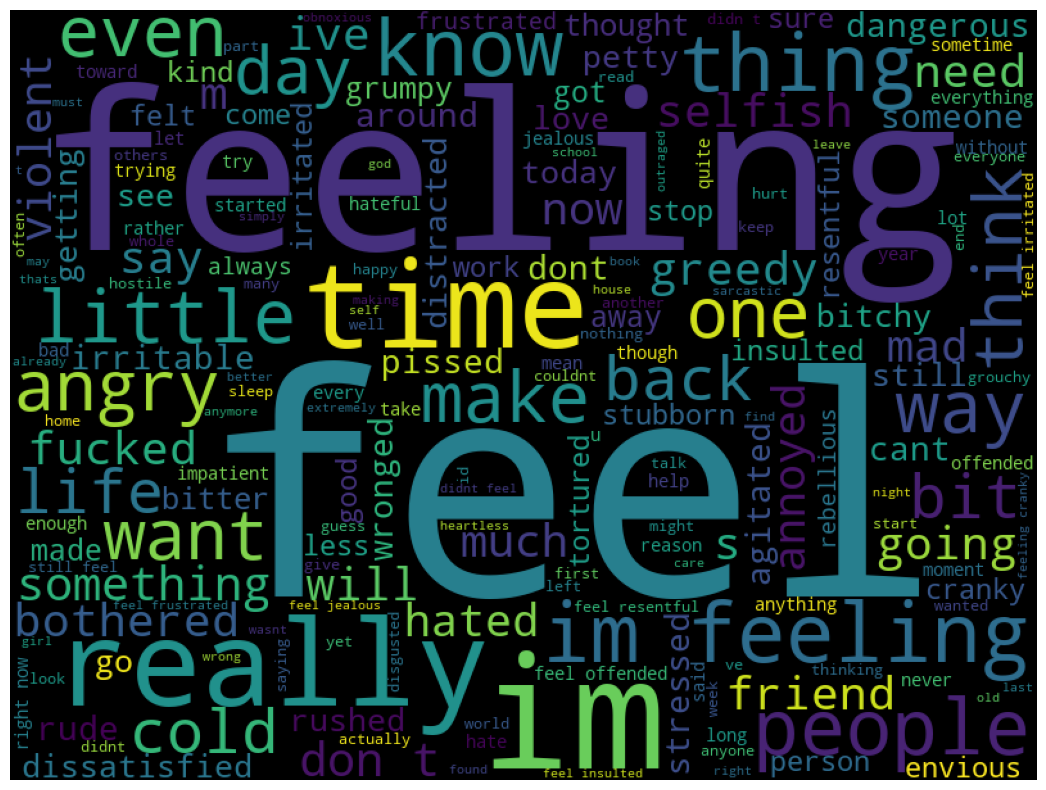

In [18]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='anger']))

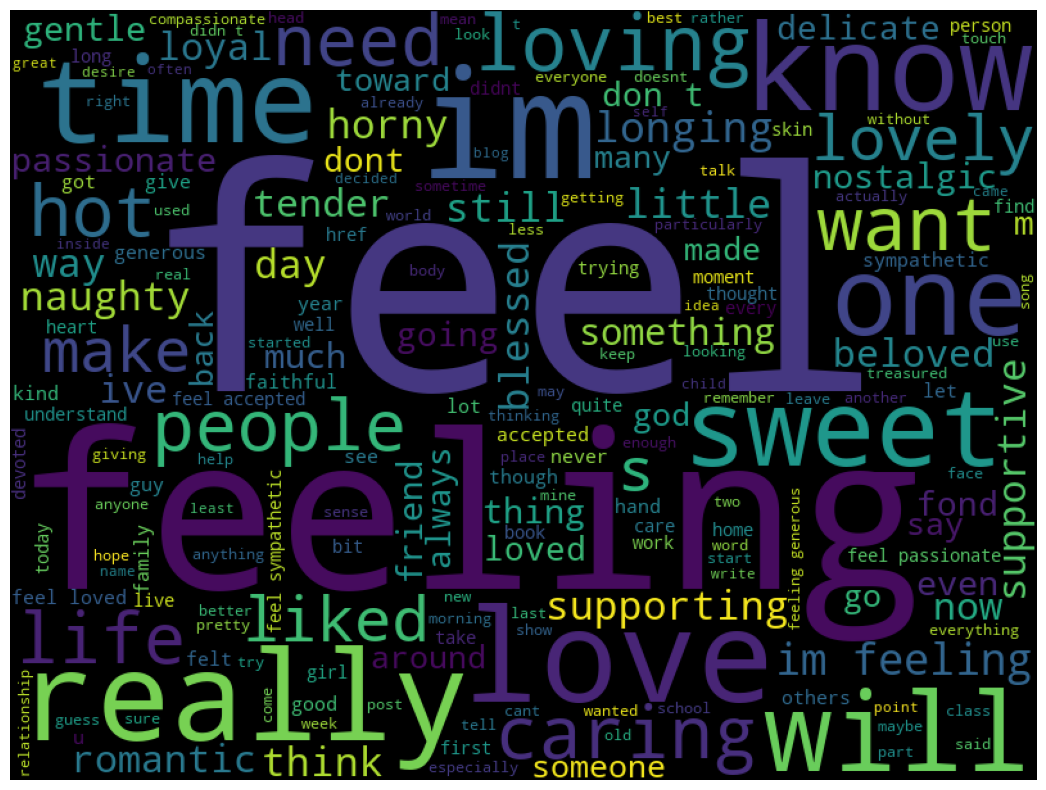

In [19]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='love']))

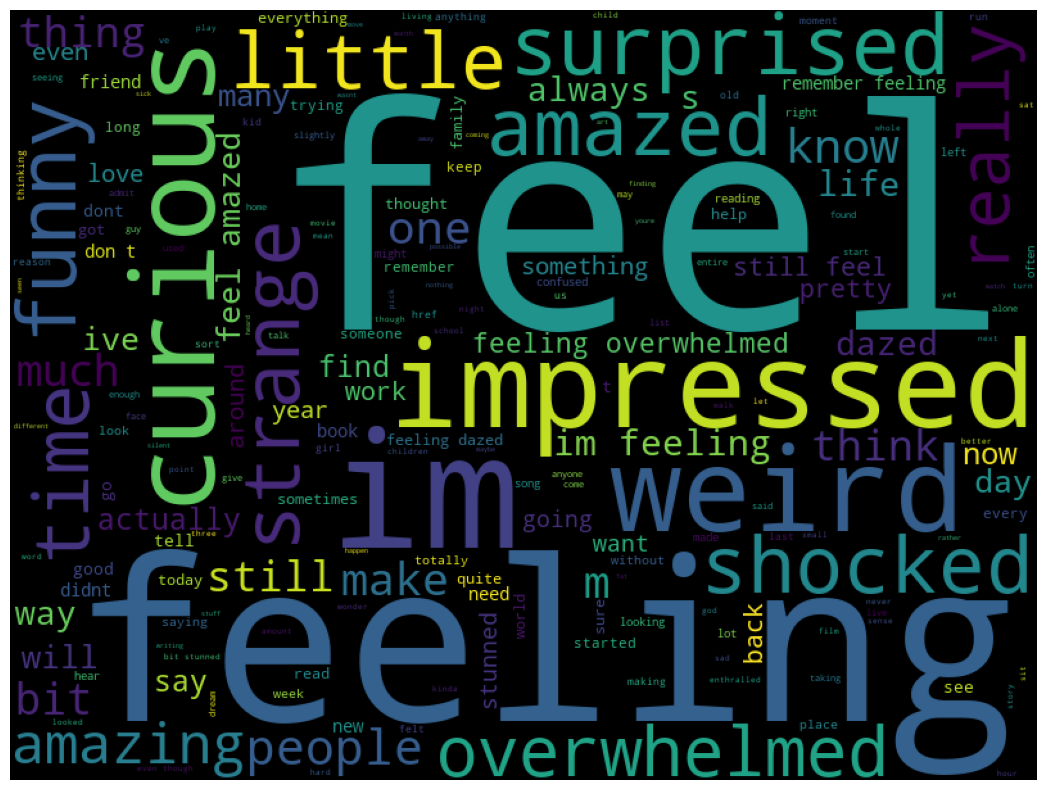

In [20]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='surprise']))

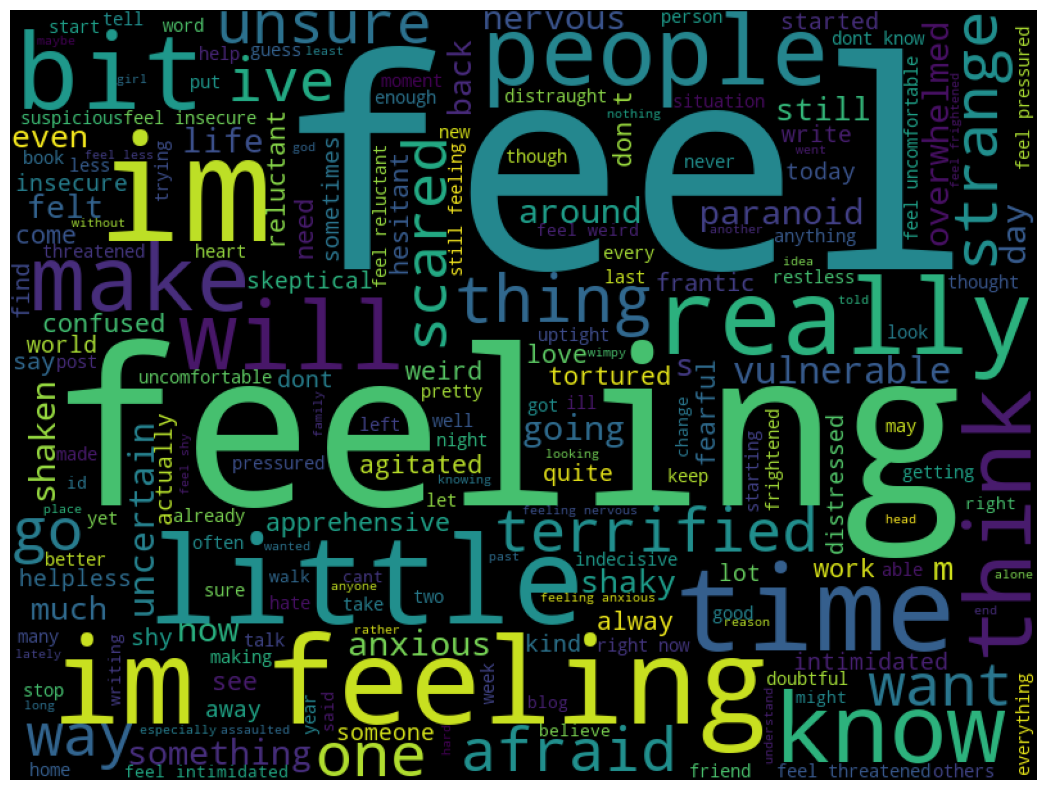

In [21]:
# Try the other labels as well...
draw_my_wordcloud(" ".join(train['text'][train['label_text']=='fear']))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer will get the words ocurring in the text corpus
# ignoring "stop words", which are a list of words that are
# considered not informative.
# min_df=5 means that only words that appear in at least 5 tweets
# max_df=500 means that only words that appear in at most 500 tweets
# will be used.


vectorizer = CountVectorizer(lowercase = True, stop_words = 'english',min_df=5, max_df=500)
vectorizer.fit(train["text"])

all_words = vectorizer.get_feature_names_out()
print (f"Vectorizer found {len(all_words)} words in the training corpus.")


Vectorizer found 3137 words in the training corpus.


In [24]:
#converting the vector to a df
train_vectorized = pd.DataFrame(vectorizer.transform(train["text"]).toarray(), columns = all_words)

val_vectorized = pd.DataFrame(vectorizer.transform(val["text"]).toarray(), columns = all_words)


In [25]:
#printing train_vectorized
train_vectorized.head()

abandoned  abilities  ability  able  absolute  absolutely  abuse  abused  \
0          0          0        0     0         0           0      0       0   
1          0          0        0     0         0           0      0       0   
2          0          0        0     0         0           0      0       0   
3          0          0        0     0         0           0      0       0   
4          0          0        0     0         0           0      0       0   

   accept  acceptable  ...  york  youd  youll  young  younger  youre  youth  \
0       0           0  ...     0     0      0      0        0      0      0   
1       0           0  ...     0     0      0      0        0      0      0   
2       0           0  ...     0     0      0      0        0      0      0   
3       0           0  ...     0     0      0      0        0      0      0   
4       0           0  ...     0     0      0      0        0      0      0   

   youve  zero  zone  
0      0     0     0  
1      0     0     0  
2      0     0     0  
3      0     0     0  
4      0     0     0  

[5 rows x 3137 columns]

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#setting to 5 nearest neighbours
k = 5

#instantiang the KNN Classifier with metric=cosine
clf = KNeighborsClassifier(n_neighbors = k, metric='cosine')

#fitting the classifier 
clf.fit(train_vectorized, train["label_text"])

KNeighborsClassifier(metric='cosine')

In [27]:
from sklearn.metrics import hamming_loss # count number of times class is wrong

In [28]:
# Notice how slow this is..

#predicting on the training set
train_preds = clf.predict(train_vectorized)

#hamming loss score on the training set
hamming_loss(train["label_text"], train_preds)

0.1393125

In [29]:
#predicting on the validation set
val_preds = clf.predict(val_vectorized)

#hamming loss score on the validation set
hamming_loss(val["label_text"], val_preds)

0.22

Last attempt was definitely better than the baseline (70%), and we didn't work hard.  There is a bit of overfitting.

**a. Discussion Point**: Can you find a better value of k to slightly reduce overfitting?

In [33]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [34]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [38]:
from sklearn.model_selection import GridSearchCV

#setting the hyper-parameters
params = {'n_neighbors': [5, 10, 15],
             'weights': ['uniform', 'distance'],
             'p': [1, 2]}

#instantiating the GridSearchCV
grid = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', refit=True, n_jobs=-1)

#Fitting the best model to the traning set
grid.fit(train_vectorized, train["label_text"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='cosine'),
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
#printing the best parameters obtained
grid.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [57]:
#predicting on the training set
train_preds_cv = grid.predict(train_vectorized)

#hamming loss score on the training set
print(f'Hamming loss on the traning set: {hamming_loss(train["label_text"], train_preds_cv)}')

#predicting on the validation set
val_preds_cv = grid.predict(val_vectorized)

#hamming loss score on the validation set
print(f'Hamming loss on the traning set: {hamming_loss(val["label_text"], val_preds_cv)}')

Hamming loss on the traning set: 0.0045
Hamming loss on the traning set: 0.203


**b. Discussion Point**: Can you draw the confusion matrix, to see which labels are confused with others?  Use sklearn documentation to do that.  Which two classes most confuse which each other?

[[2150    0    0    0    9    0]
 [   9 1918    0    0    2    8]
 [   0    0 5351    5    6    0]
 [   0    0   18 1286    0    0]
 [   3    1    0    0 4662    0]
 [   0    9    2    0    0  561]]


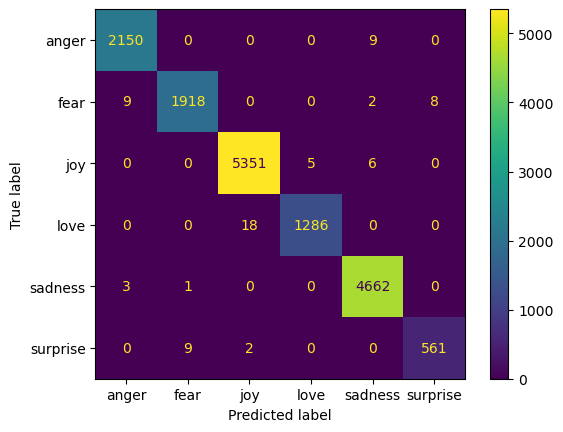

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## inspecting the confusion matrix on the training set
cm = confusion_matrix(train["label_text"],train_preds_cv, labels=grid.classes_)
print(cm)

cm_display = ConfusionMatrixDisplay(cm, display_labels=grid.classes_)
cm_display.plot()


[[0.71636364 0.01454545 0.10181818 0.00727273 0.15636364 0.00363636]
 [0.05660377 0.63207547 0.10377358 0.00471698 0.14150943 0.06132075]
 [0.01278409 0.01278409 0.87215909 0.02414773 0.07528409 0.00284091]
 [0.01685393 0.00561798 0.25842697 0.62359551 0.09550562 0.        ]
 [0.01090909 0.02       0.07272727 0.00727273 0.88363636 0.00545455]
 [0.01234568 0.04938272 0.13580247 0.01234568 0.14814815 0.64197531]]


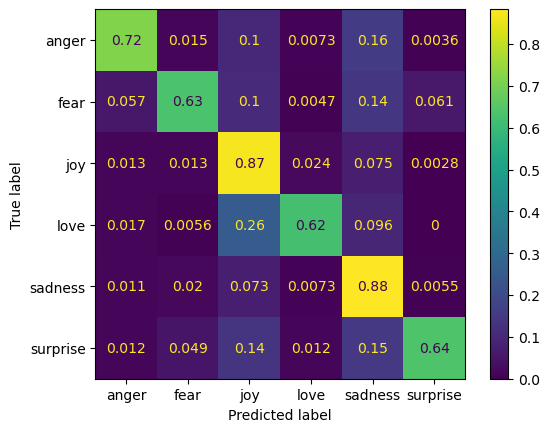

In [60]:
## inspecting the confusion matrix on the validation set

cm_val = confusion_matrix(val["label_text"],val_preds_cv, labels=grid.classes_, normalize='true')
print(cm_val)

cm_display = ConfusionMatrixDisplay(cm_val, display_labels=grid.classes_)
cm_display.plot()

# PCA: Principal Component Analysis

In [72]:
from sklearn.decomposition import PCA

# Let's start with a full PCA, to get the "scree" plot.
# This will take some time!
fitted_pca = PCA().fit(train_vectorized)

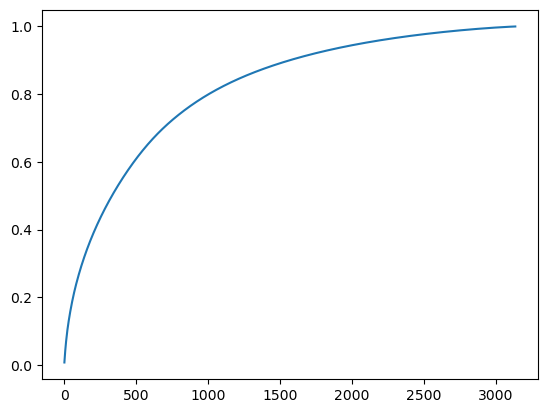

In [62]:
import matplotlib.pyplot as plt
plt.plot(fitted_pca.explained_variance_ratio_.cumsum())

The scree plot doesn't seem to have an "elbow" (a relatively steep climb, followed by a near plateau), which means that PCA may not do much here.  However, reducing dimensionality will still learn something, and will offer speedup.

In [63]:
# Only 300 components
n_components = 300

#instantiating the PCA
fitted_pca = PCA(n_components = n_components).fit(train_vectorized)

#fitting the PCA to the train set
train_reduced = fitted_pca.transform(train_vectorized)

#fitting the PCA to the validation set
val_reduced = fitted_pca.transform(val_vectorized)

In [65]:
#KNN model on the reduced set
k = 3
clf = KNeighborsClassifier(n_neighbors = k, metric='cosine')
clf.fit(train_reduced, train["label_text"])

#prediting on train
train_preds = clf.predict(train_reduced)

#measuring hamming loss on train
train_hamming_loss = hamming_loss(train["label_text"], train_preds)
print (f"Train error {train_hamming_loss}")

#prediting on validation
val_preds = clf.predict(val_reduced)
#measuring hamming loss on validation
val_hamming_loss = hamming_loss(val["label_text"], val_preds)
print (f"Val error {val_hamming_loss}")

Train error 0.297125
Val error 0.5425


With 300 components the error is quite high, but it is still learning something.  And it is much faster.

**a. Discussion Point**: Play with different values of n_components of k, report your results.  Pay attention to the time.


In [76]:
#fitting a PCA with all components
fitted_pca_1 = PCA().fit(train_vectorized)


TypeError: Index(...) must be called with a collection of some kind, 'features' was passed

In [106]:
#creating a df
df = pd.DataFrame(fitted_pca_1.explained_variance_ratio_.cumsum(), )

df.columns = ['features']

#filtering to get different ranges (60, 70, 80, 90%)
df_60 = df[df['features'] >= 0.60].head(1)
df_70 = df[df['features'] >= 0.70].head(1)
df_80 = df[df['features'] >= 0.80].head(1)
df_90 = df[df['features'] >= 0.90].head(1)
df_95 = df[df['features'] >= 0.95].head(1)


#printing the dfs to see where is the starting point to get the desired percentage 
print(df_60, df_70, df_80, df_90, df_95)

     features
484  0.600332      features
689  0.700061       features
1004  0.800123       features
1566  0.900062       features
2069  0.950023


Above shows that we need 484 features to get a retain 60% of the information, 689 features for 70%, 1004 features for 80%, 1566 features for 90% and 2069 features for 95%.

In [111]:
from datetime import datetime

# we use the number of components as analyzed in previous step
n_components = [484, 689, 1004, 1566, 2069] 


for pca in n_components: 
    start_time = datetime.now()
#instantiating the PCA
    fitted_pca = PCA(n_components = pca).fit(train_vectorized)

#fitting the PCA to the train set
    train_reduced = fitted_pca.transform(train_vectorized)

#fitting the PCA to the validation set
    val_reduced = fitted_pca.transform(val_vectorized)

#KNN model on the reduced set
    k=3
    clf = KNeighborsClassifier(n_neighbors = k, metric='cosine')
    clf.fit(train_reduced, train["label_text"])

#prediting on train
    train_preds = clf.predict(train_reduced)

#measuring hamming loss on train
    train_hamming_loss = hamming_loss(train["label_text"], train_preds)
    print (f"Train error {train_hamming_loss} with PCA = {pca}")

#prediting on validation
    val_preds = clf.predict(val_reduced)
#measuring hamming loss on validation
    val_hamming_loss = hamming_loss(val["label_text"], val_preds)
    print (f"Val error {val_hamming_loss} with PCA = {pca}")
    
    
    stop_time = datetime.now()
    print(f'Time elapsed: {stop_time-start_time}')

Train error 0.242 with PCA = 484
Val error 0.464 with PCA = 484
Time elapsed: 0:00:22.221952
Train error 0.1878125 with PCA = 689
Val error 0.3715 with PCA = 689
Time elapsed: 0:00:31.331818
Train error 0.15375 with PCA = 1004
Val error 0.304 with PCA = 1004
Time elapsed: 0:00:46.792183
Train error 0.139125 with PCA = 1566
Val error 0.279 with PCA = 1566
Time elapsed: 0:01:30.916285
Train error 0.13825 with PCA = 2069
Val error 0.2745 with PCA = 2069
Time elapsed: 0:02:08.211686



**b. Discussion Point**: Can you draw the confusion matrix, to see which labels are confused with others?  Use sklearn documentation to do that.  Which two classes most confuse which each other?


**c. Discussion Point (advanced)** Can you try reducing dimension using a feature selection algorithm, and compare the results of feature selection vs PCA (for the same number of reduced dimensions)?

Feature Selection algorithm: 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [112]:
from sklearn.feature_selection import SelectKBest, chi2


In [113]:
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection._univariate_selection:

class SelectKBest(_BaseFilter)
 |  SelectKBest(score_func=<function f_classif at 0x7f7a37e378b0>, *, k=10)
 |  
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable, default=f_classif
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See Also"). The default function only
 |      works with classification tasks.
 |  
 |      .. versionadded:: 0.18
 |  
 |  k : int or "all", default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of sh